### <font color = 'green'>Objetivo do Projeto: Verificar quais variáveis são mais importantes para o churn dos clientes<font>

Link do dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

RowNumber — corresponde ao número do registro (linha).<br>
CustomerId — contém valores aleatórios.<br>
Surname — o sobrenome de um cliente..<br>
CreditScore — ppontuação de crédito.<br>
Geography — a localização de um cliente..<br>
Gender — gênero.<br>
Age — idade.<br>
Tenure — refere-se ao número de anos que o cliente é cliente do banco.<br>
Balance — saldo na conta.<br>
NumOfProducts — refere-se ao número de produtos que um cliente comprou por meio do banco.<br>
HasCrCard — indica se um cliente tem ou não um cartão de crédito.<br>
IsActiveMember — clientes ativos.<br>
EstimatedSalary — salário.<br>
Exited — se o cliente deixou ou não o banco.<br>
Complain — o cliente tem reclamação ou não.<br>
Satisfaction Score — pontuação fornecida pelo cliente para a resolução de sua reclamação.<br>
Card Type — tipo de cartão mantido pelo cliente.<br>
Points Earned — os pontos ganhos pelo cliente por usar o cartão de crédito.<br>

In [1]:
# Importsa
import sklearn
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

### <font color = 'green'>Limpeza e Processamento dos Dados<font>

In [2]:
# Carregando os dados
df = pd.read_csv('churn.csv')

In [3]:
# Tamanho df
df.shape

(10000, 18)

In [4]:
# Primeiros registros
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
# Reordenando variável alvo
df = df[['Exited'] + [col for col in df.columns if col != 'Exited']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Exited              10000 non-null  int64  
 1   RowNumber           10000 non-null  int64  
 2   CustomerId          10000 non-null  int64  
 3   Surname             10000 non-null  object 
 4   CreditScore         10000 non-null  int64  
 5   Geography           10000 non-null  object 
 6   Gender              10000 non-null  object 
 7   Age                 10000 non-null  int64  
 8   Tenure              10000 non-null  int64  
 9   Balance             10000 non-null  float64
 10  NumOfProducts       10000 non-null  int64  
 11  HasCrCard           10000 non-null  int64  
 12  IsActiveMember      10000 non-null  int64  
 13  EstimatedSalary     10000 non-null  float64
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
# Tirando espaço dos nomes de colunas
df.columns = df.columns.str.replace(" ", "_")

In [8]:
# Deletando colunas que não serão usadas

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)


In [9]:
df.head()

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,0,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,0,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [10]:
# Verificando valores ausentes
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### <font color = 'green'>Análise Exploratória e Engenharia de Atributos<font>

In [11]:
# Verificando outliers com boxplot

def boxplot_outliers():

    variaveis = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point_Earned']
    
    # Linhas e colunas
    n_vars = len(variaveis)
    n_cols = 4
    n_rows = 2
    
    
    plt.figure(figsize=(16, 5 * n_rows)) #Ajusta o tamanho da figura com base no número de linhas
    
    for i, var in enumerate(variaveis):
        plt.subplot(n_rows, n_cols, i + 1) #Usa n_rows e n_cols para criar os subplots
        sns.boxplot(y=df[var])
        plt.title(f"Boxplot {var}")
        plt.ylabel(var)
    
    plt.tight_layout()
    plt.show()

Verificando o boxplot, é possível observar na variável CreditScore os outliers, sendo estes pontos localizados abaixo do limite inferior do boxplot, ou seja, que tiveram pontuação de crédito abaixo que os demais clientes. Porém, esses outliers serão mantidos, pois como será visto abaixo, todos os clientes com o CreditScore baixo tiveram o valor 1 na variável alvo Exited, ou seja, deixaram o banco, sendo uma informação importante para verificar quais variáveis são as mais importantes para o churn do cliente.

In [12]:
# Calculando o IQR
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df[(df['CreditScore'] < limite_inferior) | (df['CreditScore'] > limite_superior)]

outliers

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned
7,1,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,2,DIAMOND,282
942,1,376,France,Female,46,6,0.00,1,1,0,157333.69,1,2,PLATINUM,979
1193,1,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1,2,SILVER,324
1405,1,359,France,Female,44,6,128747.69,1,1,0,146955.71,1,1,PLATINUM,981
1631,1,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1,3,SILVER,643
1838,1,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1,2,GOLD,261
1962,1,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1,4,SILVER,976
2473,1,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1,4,SILVER,453
2579,1,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1,4,DIAMOND,342
8154,1,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1,3,PLATINUM,592


No gráfico abaixo, usando a regra empírica também é possível verificarmos os outliers, sendo estes os valores que estão em uma distância da média a mais de 3 desvios padrão.

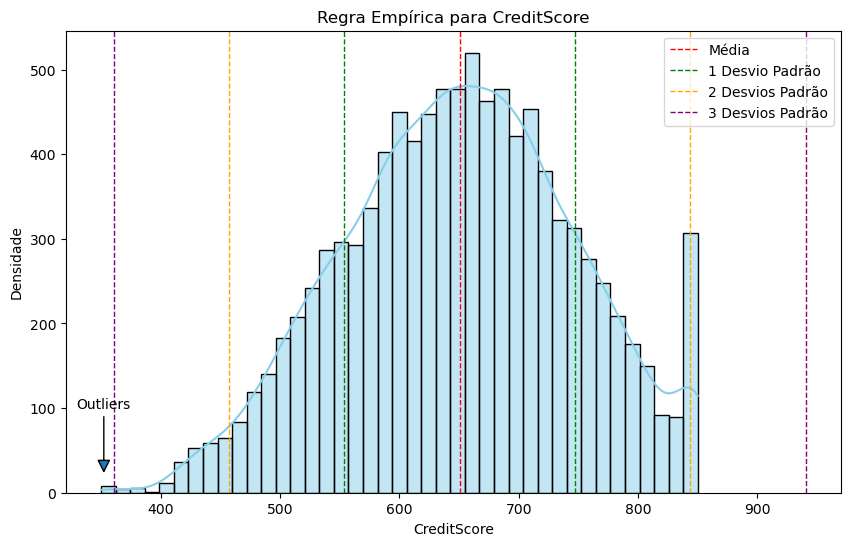

In [13]:
# Calculando a média e o desvio padrão
media = df['CreditScore'].mean()
desvio_padrao = df['CreditScore'].std()

# Definindo os limites da regra empírica
limite_inferior_1 = media - desvio_padrao
limite_superior_1 = media + desvio_padrao
limite_inferior_2 = media - 2 * desvio_padrao
limite_superior_2 = media + 2 * desvio_padrao
limite_inferior_3 = media - 3 * desvio_padrao
limite_superior_3 = media + 3 * desvio_padrao

# Calculando a média dos outliers
outliers = df[(df['CreditScore'] < limite_inferior_3) | (df['CreditScore'] > limite_superior_3)]
media_outliers = outliers['CreditScore'].mean()

# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], kde=True, color='skyblue')

# Adicionando linhas verticais para os limites da regra empírica
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label='Média')
plt.axvline(limite_inferior_1, color='green', linestyle='dashed', linewidth=1, label='1 Desvio Padrão')
plt.axvline(limite_superior_1, color='green', linestyle='dashed', linewidth=1)
plt.axvline(limite_inferior_2, color='orange', linestyle='dashed', linewidth=1, label='2 Desvios Padrão')
plt.axvline(limite_superior_2, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(limite_inferior_3, color='purple', linestyle='dashed', linewidth=1, label='3 Desvios Padrão')
plt.axvline(limite_superior_3, color='purple', linestyle='dashed', linewidth=1)

# Adicionando a flecha e o texto para a média dos outliers
plt.annotate('Outliers', xy=(media_outliers, 20), xytext=(media_outliers, 100),  # Posiciona o texto e a seta bem acima do gráfico
             arrowprops=dict(arrowstyle="-|>", mutation_scale=20,  # Estilo de seta com ponta e escala maior
                             connectionstyle="arc3"),
             ha='center')

# Adicionando rótulos e título
plt.title('Regra Empírica para CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [14]:
# Outliers NumOfProducts
# Calculando o IQR
Q1 = df['NumOfProducts'].quantile(0.25)
Q3 = df['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df[(df['NumOfProducts'] < limite_inferior) | (df['NumOfProducts'] > limite_superior)]

In [15]:
outliers

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned
7,1,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,2,DIAMOND,282
70,1,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1,4,GOLD,725
1254,1,628,France,Female,46,1,46870.43,4,1,0,31272.14,1,1,DIAMOND,826
1469,1,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1,3,PLATINUM,991
1488,1,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1,2,SILVER,317
1701,1,792,France,Male,50,9,0.00,4,1,1,194700.81,1,4,DIAMOND,369
1876,1,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1,2,GOLD,436
2124,1,704,France,Male,32,7,127785.17,4,0,0,184464.70,1,1,PLATINUM,981
2196,1,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1,4,PLATINUM,668
2285,1,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1,1,GOLD,712


In [16]:
quantidade_outliers = (len(outliers)/len(df)) * 100

print("A quantidade de outliers em NumOfProducts em relação a todo o dataset é: {} %".format(quantidade_outliers))

A quantidade de outliers em NumOfProducts em relação a todo o dataset é: 0.6 %


Como os outliers da variável NumOfProducts é muito baixa, eles serão excluídos dos dados

In [17]:
# Filtrando o DataFrame para REMOVER os outliers
df = df[(df['NumOfProducts'] >= limite_inferior) & (df['NumOfProducts'] <= limite_superior)]

In [18]:
# Outliers Age
# Calculando o IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df[(df['Age'] < limite_inferior) | (df['Age'] > limite_superior)]

In [19]:
outliers

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned
58,1,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1,5,SILVER,549
85,0,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0,5,DIAMOND,651
104,1,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1,2,GOLD,915
158,0,646,France,Female,73,6,97259.25,1,0,1,104719.66,0,1,PLATINUM,250
181,0,510,France,Male,65,2,0.00,2,1,1,48071.61,0,1,SILVER,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,0,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0,2,DIAMOND,430
9765,0,445,France,Male,64,2,136770.67,1,0,1,43678.06,0,3,DIAMOND,650
9832,1,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1,3,GOLD,808
9894,0,521,France,Female,77,6,0.00,2,1,1,49054.10,0,4,DIAMOND,366


In [20]:
quantidade_outliers = (len(outliers)/len(df)) * 100

print("A quantidade de outliers em NumOfProducts em relação a todo o dataset é: {:.2f} %".format(quantidade_outliers))

A quantidade de outliers em NumOfProducts em relação a todo o dataset é: 3.60 %


É normal que tenhamos clientes de todas as idades no dataset de clientes de um banco, desde mais jovens até bem idosos, dado isto, será mantido os outliers da variável idade.

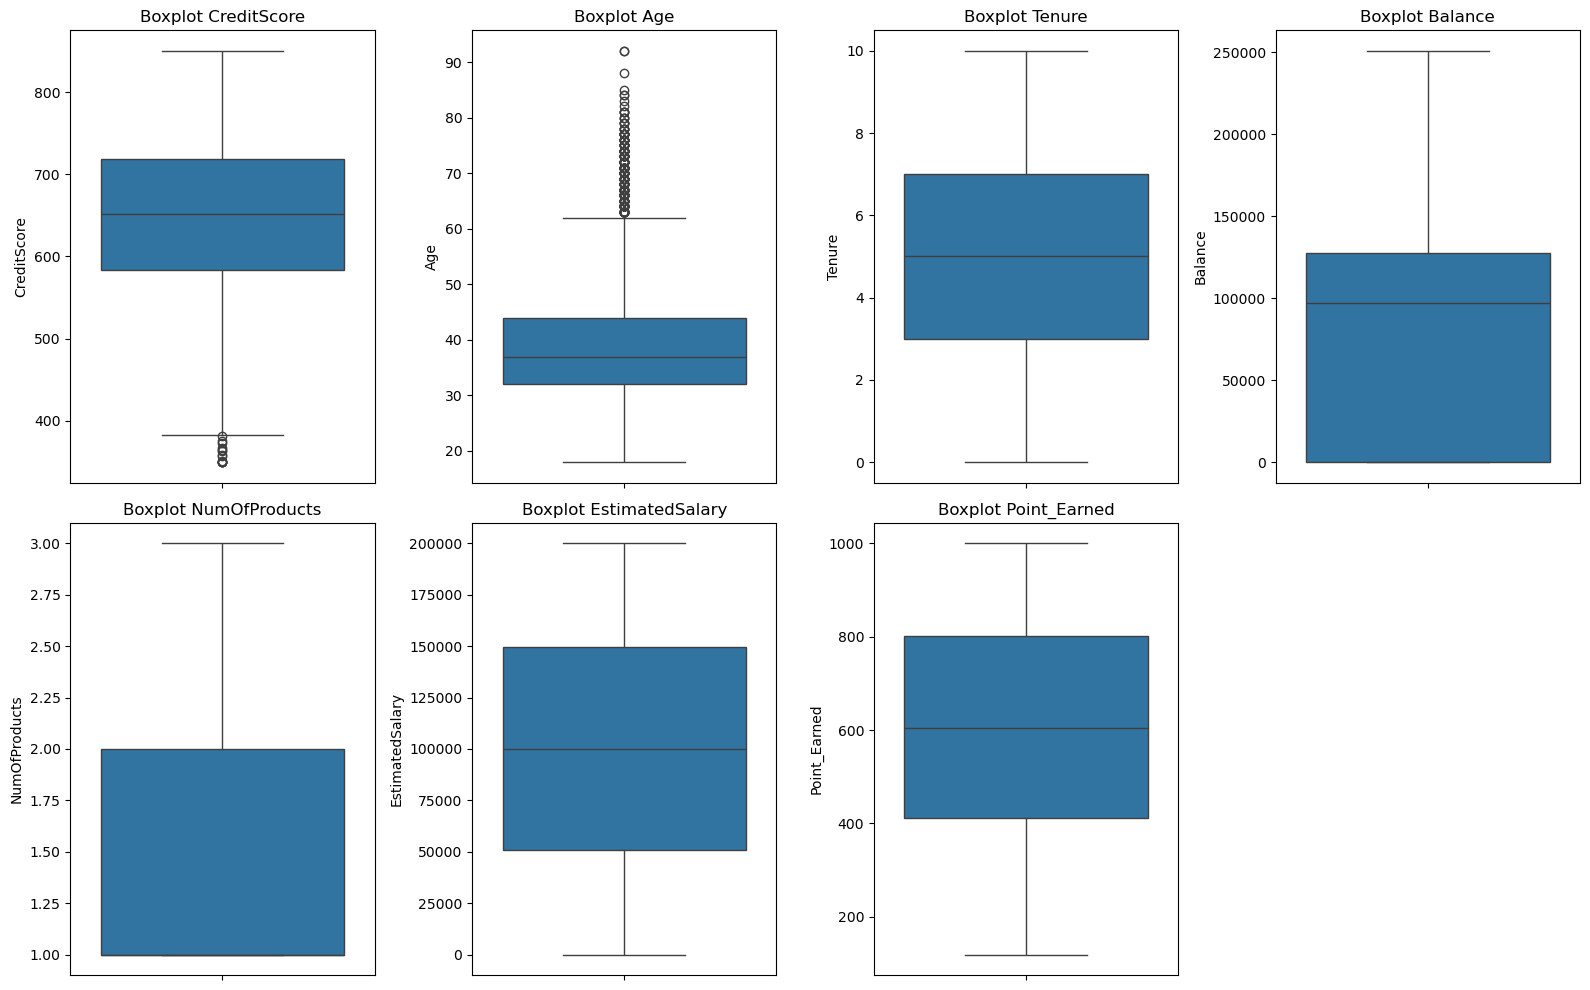

In [21]:
boxplot_outliers()

In [22]:
df.head()

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,0,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,0,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


### <font color = 'green'>Extraindo Insights com Análise Multivariada<font>

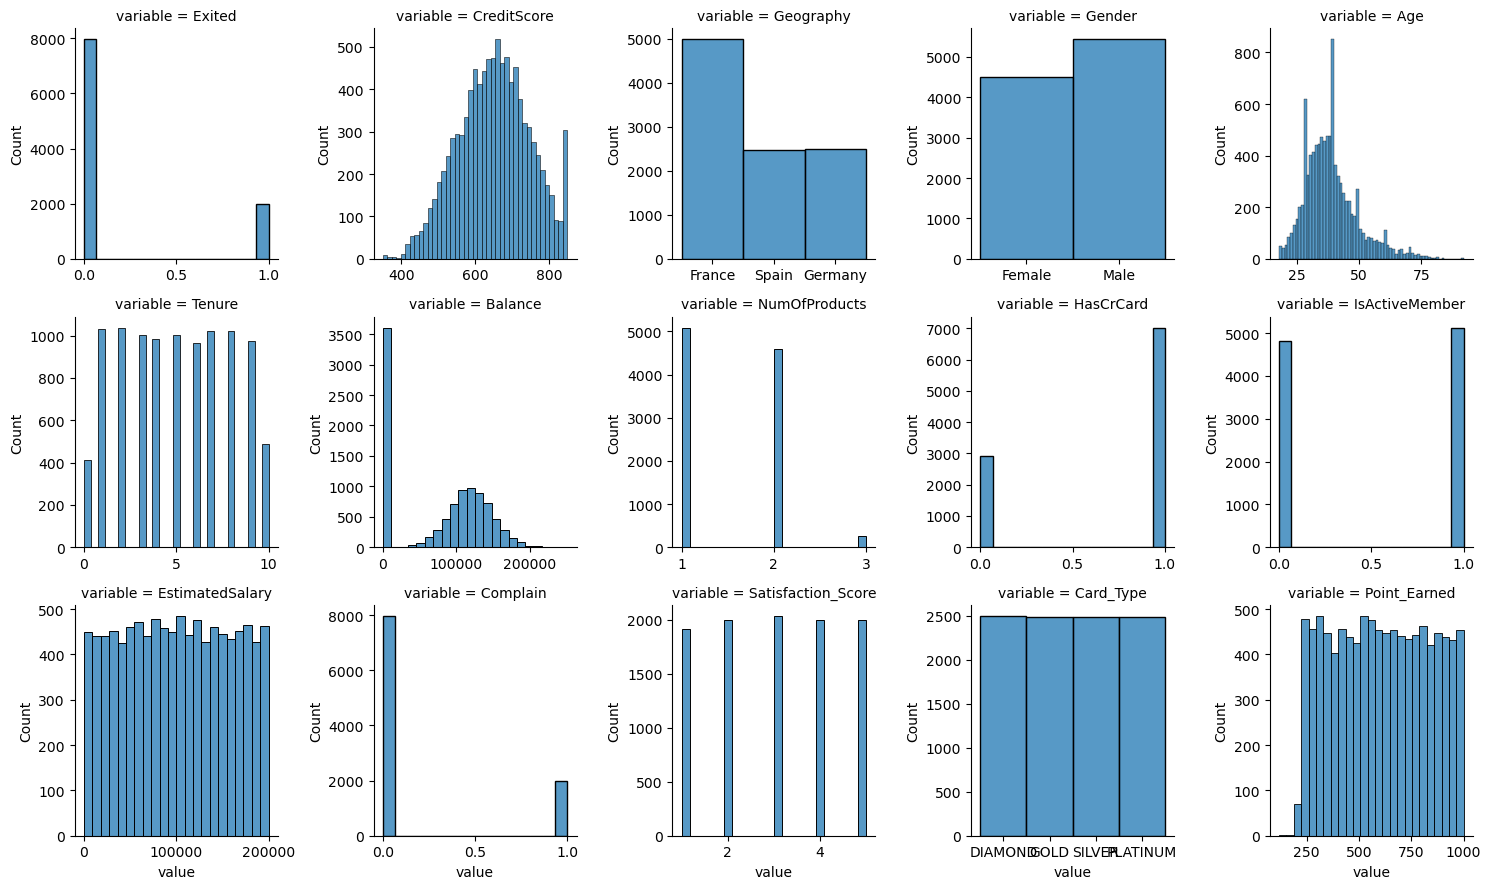

In [23]:
# Distribuição das Variáveis
hist = pd.melt(df, value_vars = df )
hist = sns.FacetGrid (hist, col = 'variable', col_wrap = 5, sharex = False, sharey = False)
hist.map(sns.histplot, 'value')
plt.show()

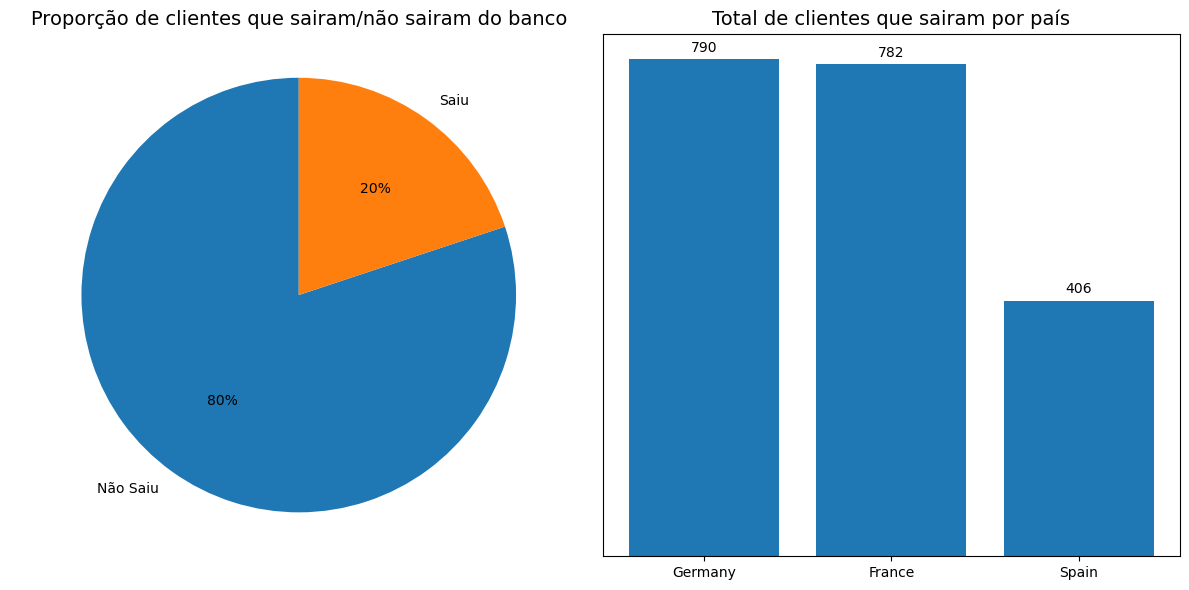

In [24]:
# Análise da varoável Exited

# Criando a figura e os eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de pizza (proporção de clientes que sairam/não sairam)
counts = df['Exited'].value_counts()
labels = ['Saiu' if i == 1 else 'Não Saiu' for i in counts.index]
ax1.pie(counts, labels=labels, autopct='%.0f%%', startangle=90)
ax1.set_title('Proporção de clientes que sairam/não sairam do banco', fontsize=14)
ax1.axis('equal')

# Gráfico de barras (total de pessoas que sairam por país)
exited_by_country = df[df['Exited'] == 1]['Geography'].value_counts()
bars = ax2.bar(exited_by_country.index, exited_by_country.values)
ax2.set_title('Total de clientes que sairam por país', fontsize=14)
ax2.set_yticks([])

# Adicionando os valores acima das barras
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Exibindo os gráficos
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

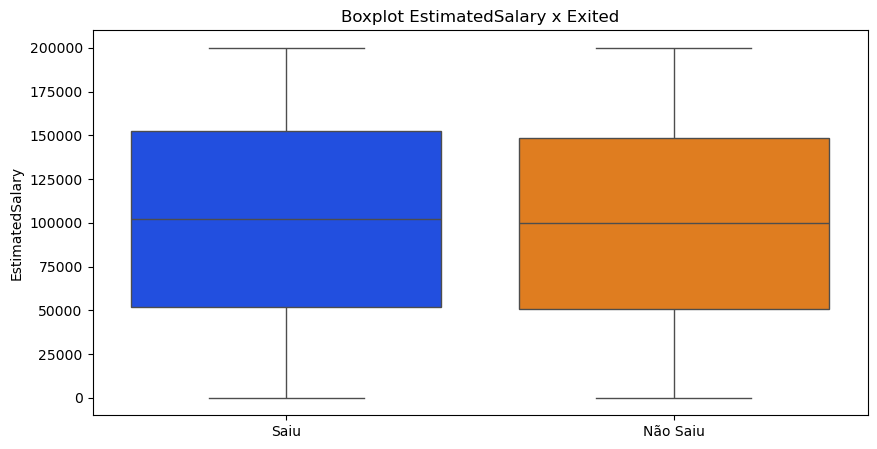

In [25]:
# Relação entre EstimatedSalary e Exited

plt.figure(figsize = (10,5))
sns.boxplot(x=['Saiu' if saiu == 1 else 'Não Saiu' for saiu in df['Exited']], y='EstimatedSalary', data=df, palette='bright');
plt.title("Boxplot EstimatedSalary x Exited")
plt.show()

Observando o boxplot, não há muita diferença na média dos salários dos clientes que saíram e aqueles que não saíram. Isso pode ser observado no valor de correlação abaixo, indicando que as variáveis não estão fortemente correlacionadas.

In [26]:
# Calculando e imprimindo o coeficiente de correlação
correlation = df['Exited'].corr(df['EstimatedSalary'])
print(f"Coeficiente de correlação: {correlation:.2f}")

Coeficiente de correlação: 0.01


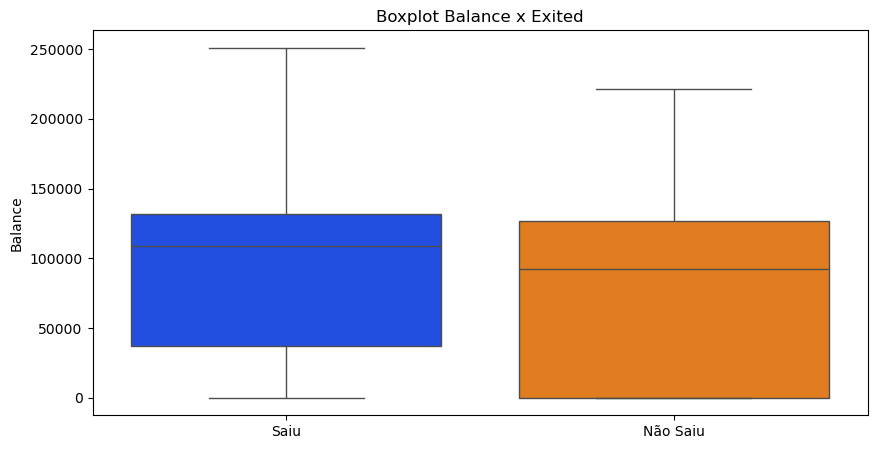

In [27]:
# Relação entre EstimatedSalary e Exited

plt.figure(figsize = (10,5))
sns.boxplot(x=['Saiu' if saiu == 1 else 'Não Saiu' for saiu in df['Exited']], y='Balance', data=df, palette='bright');
plt.title("Boxplot Balance x Exited")
plt.show()

A mesma coisa pode ser observada com a variável Balance, indicando que o valor que o cliente tem na conta pode não ser tão influente pro cliente decidir sair do banco

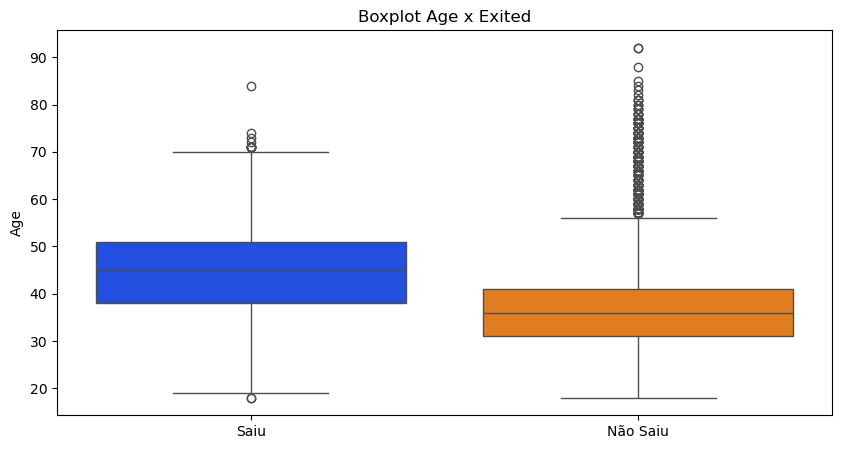

In [28]:
# Relação entre EstimatedSalary e Age

plt.figure(figsize = (10,5))
sns.boxplot(x=['Saiu' if saiu == 1 else 'Não Saiu' for saiu in df['Exited']], y='Age', data=df, palette='bright');
plt.title("Boxplot Age x Exited")
plt.show()

É possível verificar pelo boxplot que as pessoas que sairam do banco possuem uma idade mais avançada do que as que permaneceram.

In [29]:
# Calculando e imprimindo o coeficiente de correlação
correlation = df['Exited'].corr(df['Balance'])
print(f"Coeficiente de correlação: {correlation:.2f}")

Coeficiente de correlação: 0.12


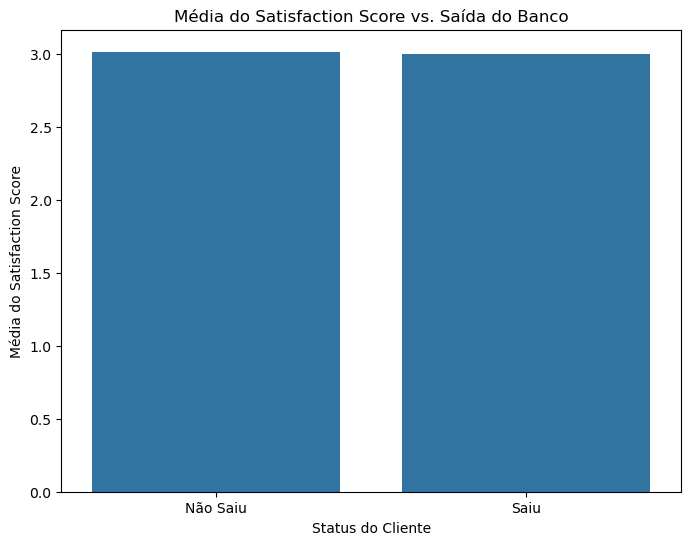

In [30]:
# Calculando a média do Satisfaction_Score para cada valor de Exited
mean_satisfaction = df.groupby('Exited')['Satisfaction_Score'].mean()

# Criando o gráfico de barras com os rótulos "Saiu" e "Não Saiu"
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Não Saiu' if saiu == 0 else 'Saiu' for saiu in mean_satisfaction.index], y=mean_satisfaction.values)
plt.xlabel('Status do Cliente')  # Rótulo do eixo x mais descritivo
plt.ylabel('Média do Satisfaction Score')
plt.title('Média do Satisfaction Score vs. Saída do Banco')
plt.show()



É possível observar que a média de Satisfação para que saiu e não saiu é a mesma, mostrando que também pode ser um fator que não influencia na decisão de sair.

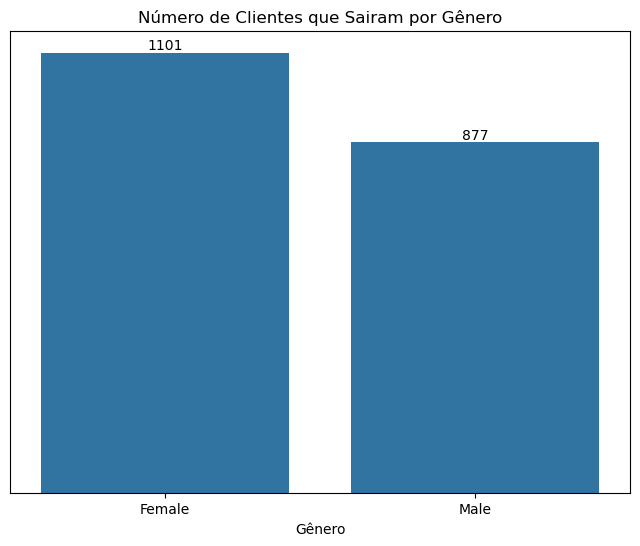

In [31]:
# Contando a quantidade de saídas (Exited == 1) para cada gênero
gender_exited = df[df['Exited'] == 1]['Gender'].value_counts()

# Criando o gráfico de barras com os valores acima das barras (método simplificado)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_exited.index, y=gender_exited.values)
plt.xlabel('Gênero')
plt.yticks([])
plt.title('Número de Clientes que Sairam por Gênero')

# Adicionando os valores acima das barras com ax.bar_label()
ax.bar_label(ax.containers[0])

plt.show()

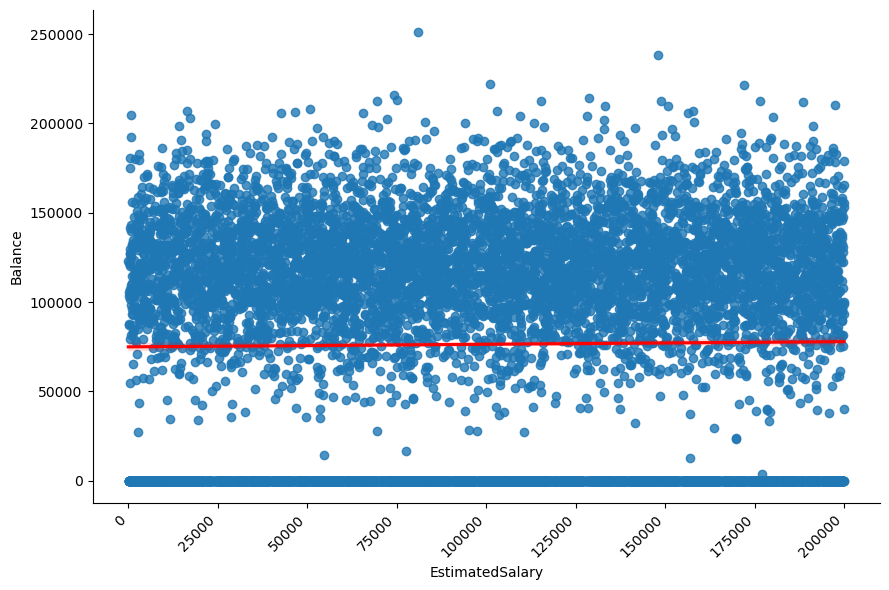

In [32]:
# Verificando a relação do EstimatedSalary com Balance

# Criando o gráfico lmplot com conversão dentro da chamada
sns.lmplot(x='EstimatedSalary', y='Balance', data=df, palette='blue', line_kws={'color': 'red'}, height=6, aspect=1.5)

# Ajustando os ticks do eixo x
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

É possível observar que não há uma relação entre o salário e os valores na conta do cliente, ou seja, pessoas que ganham mais no caso desses dados não deixam mais dinheiro na conta do que aqueles que ganham menos.

In [33]:
# Criando um mapa de correlação

### <font color = 'green'>Quais Fatores São Mais Importantes Para Explicar a Decisão do Cliente em Sair ou Não do Banco?<font>

In [34]:
# Converte as variáveis do tipo texto em representação numérica usando One-Hot Encoding
df = pd.get_dummies(df, columns = ['Geography', 'Gender', 'Card_Type'])

In [35]:
df.head(1)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,...,Point_Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card_Type_DIAMOND,Card_Type_GOLD,Card_Type_PLATINUM,Card_Type_SILVER
0,1,619,42,2,0.0,1,1,1,101348.88,1,...,464,True,False,False,True,False,True,False,False,False


In [36]:
# Substituindo True por 1 e False por 0 apenas nas colunas booleanas
for col in df.columns:
    if pd.api.types.is_bool_dtype(df[col]):
        df[col] = df[col].replace({True: 1, False: 0})

In [37]:
# Configurando o Pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

In [38]:
df.head(1)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Point_Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card_Type_DIAMOND,Card_Type_GOLD,Card_Type_PLATINUM,Card_Type_SILVER
0,1,619,42,2,0.0,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0


In [39]:
# Criando mapa de correlação

df_corr = df.corr()
column_corr = df_corr.loc['Exited']

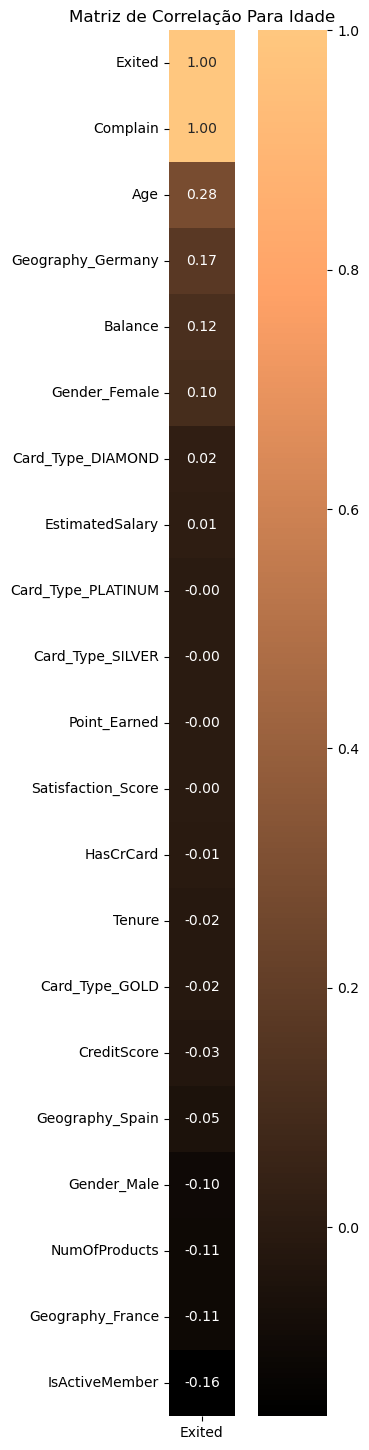

In [40]:
# Plot
plt.figure(figsize = (6, 18))
sns.heatmap(pd.DataFrame(column_corr.sort_values(ascending = False)), 
            annot = True, 
            cmap = 'copper', 
            cbar = True,
            square = True,
            fmt = '.2f')
plt.title('Matriz de Correlação Para Idade')
plt.show()

É possível verificar pela matriz de correlação, que a variável Complain é a que tem a maior correlação para a saída de clientes do banco, seguido da variável idade

In [41]:
# Separando as features (X) e o target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

In [42]:
# Cria o modelo
modelo_rf = RandomForestClassifier(random_state = 43)  

In [43]:
# Treina o modelo
modelo = modelo_rf.fit(X,y)

In [44]:
# Extrai a importância de cada variável
importances = modelo.feature_importances_

In [45]:
# Desvio padrão das importâncias das características (feature importances) 
std = np.std([tree.feature_importances_ for tree in modelo.estimators_], axis = 0)

In [46]:
# Índices
indices = np.argsort(importances)

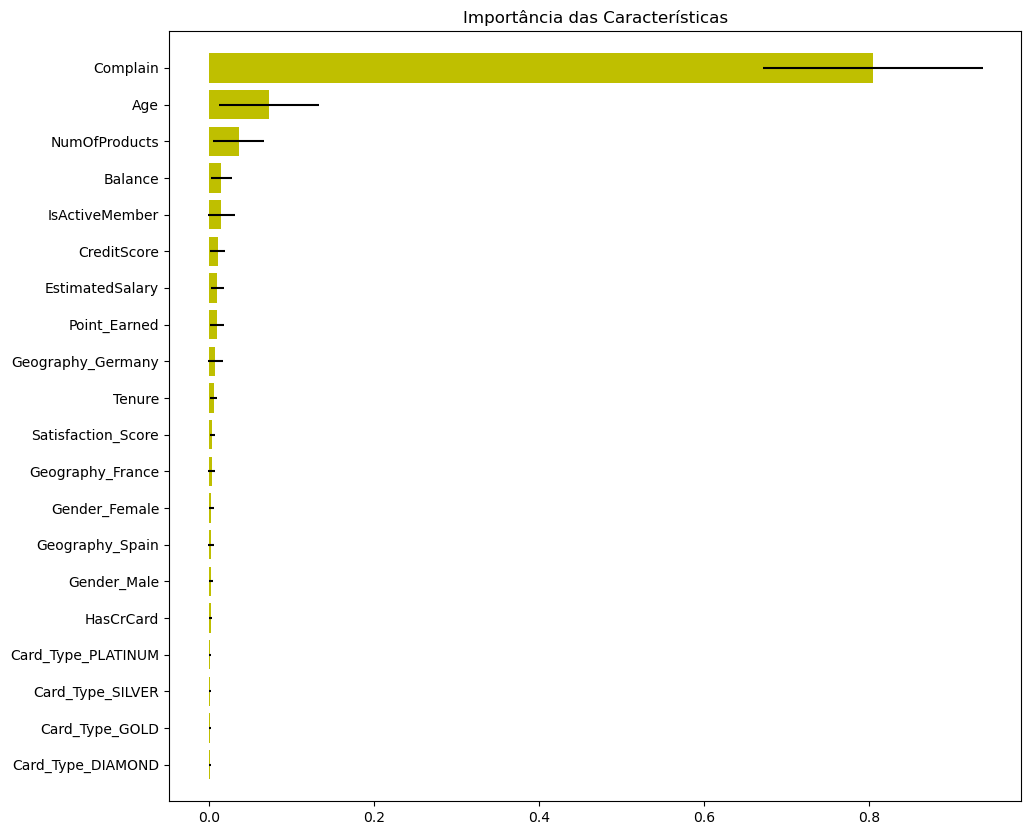

In [47]:
# Plot
plt.figure(1, figsize = (11, 10))
plt.title("Importância das Características")
plt.barh(range(X.shape[1]), importances[indices], color = "y", xerr = std[indices], align = "center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

É possível verificar que a variável mais importante para a saída do cliente é a Complain, ou seja, se já teve ou não reclamação do cliente, confirmando o que o gráfico de correlação anteriormente tinha demonstrado.

### <font color = 'green'>Conclusão<font>

Foi possível verificar que três variáveis são as mais importantes para o cliente decidir deixar o banco: Complain (Reclamação), Age (Idade) e NumOfProducts (Número de Produtos). Vamos entender cada uma delas:

Complain: A correlação positiva entre reclamações e a saída de clientes é intuitiva. Clientes que reclamam mais estão expressando insatisfação com o serviço. Se essas reclamações não forem tratadas adequadamente, é mais provável que o cliente procure outro banco. É crucial ter um sistema eficiente de gerenciamento de reclamações para identificar os problemas e resolvê-los rapidamente.

Age: A relação entre idade e churn pode ser complexa e depender do contexto. Pessoas mais velhas podem ter maior fidelidade a bancos tradicionais, mas também podem ser mais sensíveis a mudanças ou dificuldades no uso de novas tecnologias, como aplicativos bancários. Por outro lado, clientes mais jovens podem estar mais dispostos a mudar de banco em busca de melhores taxas ou serviços digitais mais modernos. Investigar as causas dessa correlação dentro do seu conjunto de dados específico é fundamental. Segmentar os clientes por idade e analisar suas necessidades e comportamentos pode ser útil para desenvolver estratégias de retenção personalizadas.

Numofproducts: A correlação negativa sugere que clientes com mais produtos contratados têm menor probabilidade de sair. Isso faz sentido, pois clientes com vários produtos (conta corrente, poupança, investimentos, seguros, etc.) tendem a ter um relacionamento mais profundo com o banco, o que dificulta a migração para outra instituição. Incentivar a contratação de mais produtos por cliente pode ser uma estratégia eficaz para aumentar a retenção.


### <font color='green'>Sistema e Versões dos Pacotes</font>

In [48]:
%reload_ext watermark
%watermark -v -m
%watermark --iversions

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.25.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 186 Stepping 3, GenuineIntel
CPU cores   : 12
Architecture: 64bit

seaborn   : 0.13.2
numpy     : 1.26.4
matplotlib: 3.8.4
sklearn   : 1.4.2
scipy     : 1.13.1
missingno : 0.5.2
pandas    : 2.2.2

